In [1]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns



# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_results = session.query(Measurement.date,Measurement.tobs).filter(extract('month' , Measurement.date)==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
june_list = list(june_results)

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_list, columns=['date',' June Temps'])

june_temp_df.set_index(june_temp_df['date'],inplace =False)


,date,June Temps
date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0
...,...,...
2017-06-26,2017-06-26,79.0
2017-06-27,2017-06-27,74.0
2017-06-28,2017-06-28,74.0


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


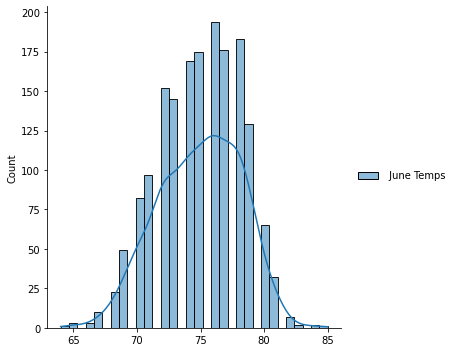

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.

sns.displot(june_temp_df, kde=True)
june_temp_df.describe()


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date,Measurement.tobs).filter(extract('month' , Measurement.date)==12).all()


In [9]:
# 7. Convert the December temperatures to a list.
dec_list=list(dec_results)

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_list, columns=['date',' Dec Temps'])
dec_temp_df.set_index(dec_temp_df['date'],inplace =False)


,date,Dec Temps
date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0
...,...,...
2016-12-27,2016-12-27,71.0
2016-12-28,2016-12-28,71.0
2016-12-29,2016-12-29,69.0


,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


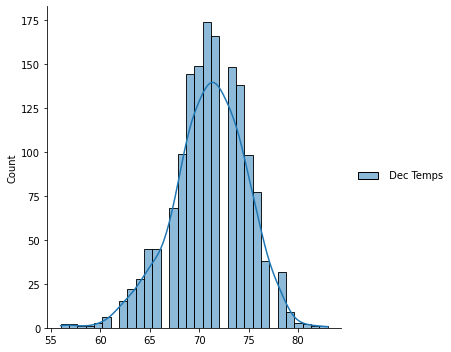

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
sns.displot(dec_temp_df,kde=True)


dec_temp_df.describe()



## D3. Additional Queries 

In [12]:
# Stats for Temperature for Each Station During June.

june_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 6).all()
june_station_df=pd.DataFrame(june_station,columns=['June Temp', 'Station'])
june_station_df.head(10)


,June Temp,Station
0,78.0,USC00519397
1,76.0,USC00519397
2,78.0,USC00519397
3,76.0,USC00519397
4,77.0,USC00519397
5,78.0,USC00519397
6,77.0,USC00519397
7,78.0,USC00519397
8,78.0,USC00519397
9,79.0,USC00519397


In [13]:
#Stats for Precipitation For June.

june_prcp = session.query( Measurement.prcp).filter(extract('month',Measurement.date)== 6).all()
june_prcp_df=pd.DataFrame(june_prcp,columns=[ 'Precipitation(Inches)'])
june_prcp_df.describe()

,Precipitation(Inches)
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [14]:
#Stats for Precipitation For December
dec_prcp = session.query( Measurement.prcp).filter(extract('month',Measurement.date)== 12).all()
dec_prcp_df=pd.DataFrame(dec_prcp,columns=[ 'Precipitation(Inches)'])
dec_prcp_df.describe()

,Precipitation(Inches)
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [15]:
#Stats for Temperature for Each Station During December

dec_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 12).all()
dec_station_df=pd.DataFrame(dec_station,columns=['Dec Temp', 'Station'])
dec_station_df.head(10)

,Dec Temp,Station
0,76.0,USC00519397
1,74.0,USC00519397
2,74.0,USC00519397
3,64.0,USC00519397
4,64.0,USC00519397
5,67.0,USC00519397
6,77.0,USC00519397
7,66.0,USC00519397
8,69.0,USC00519397
9,68.0,USC00519397


In [16]:
# Comparing Temperature For Stations :

station_df = june_station_df.merge(dec_station_df ,on ="Station" , how = "inner" ).set_index("Station")
station_df.head(10)


,June Temp,Dec Temp
Station,,
USC00519397,78.0,76.0
USC00519397,78.0,74.0
USC00519397,78.0,74.0
USC00519397,78.0,64.0
USC00519397,78.0,64.0
USC00519397,78.0,67.0
USC00519397,78.0,77.0
USC00519397,78.0,66.0
USC00519397,78.0,69.0


Text(0.5, 0, 'Month')

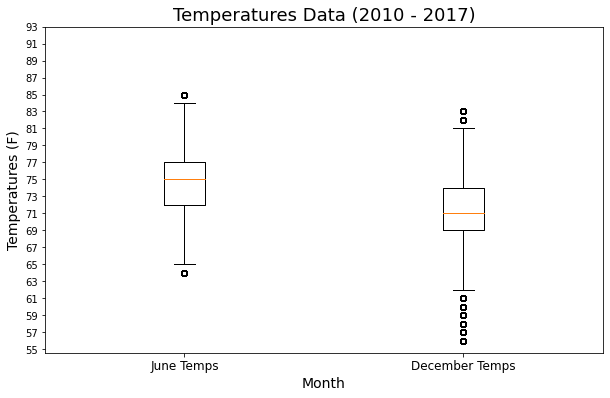

In [17]:

#Plot the Box & Whiskers
x_labels = ["June Temps", "December Temps"]
temps = [station_df["June Temp"],station_df["Dec Temp"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(55, 95, step=2.0))
ax.set_title('Temperatures Data (2010 - 2017)',fontsize=18)
ax.set_ylabel('Temperatures (F)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)

In [21]:
june_prcp_df = june_prcp_df.dropna()
dec_prcp_df = dec_prcp_df.dropna()

Text(0.5, 0, 'Month')

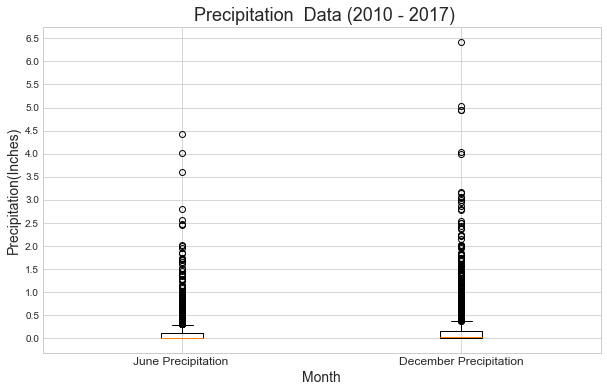

In [24]:
plt.style.use('seaborn-whitegrid')

#Plot the Box & Whiskers
x_labels = ["June Precipitation ", "December Precipitation"]
precipitations = [june_prcp_df["Precipitation(Inches)"],dec_prcp_df["Precipitation(Inches)"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(precipitations, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(0, 7, step=0.5))
ax.set_title(' Precipitation  Data (2010 - 2017)',fontsize=18)
ax.set_ylabel('Precipitation(Inches)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)